<a href="https://colab.research.google.com/github/Anonymous143w/PBL-Project-Sentiment-analysis-on-audio/blob/main/Updated%20Audio%20Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd

In [95]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [96]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [97]:
!pip install -q kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"whysoserious143","key":"350e02704f3348901edd1715b54494c6"}'}

In [6]:
! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle dataset list

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: argument command: invalid choice: 'dataset' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'models', 'm', 'files', 'f', 'config')


In [10]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

 97% 417M/428M [00:07<00:00, 43.7MB/s]
100% 428M/428M [00:07<00:00, 56.2MB/s]


In [11]:
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [98]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
         break
print('Dataset is Loaded')

Dataset is Loaded


In [99]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("/content/TESS Toronto emotional speech set data/OAF_*/*.wav"):
        file_name=os.path.basename(file)

        x.append(paths)
        y.append(labels)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=7)

In [100]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [101]:
len(paths)

2800

In [102]:
paths[:5]

['/content/TESS Toronto emotional speech set data/YAF_neutral/YAF_soup_neutral.wav',
 '/content/TESS Toronto emotional speech set data/YAF_neutral/YAF_tell_neutral.wav',
 '/content/TESS Toronto emotional speech set data/YAF_neutral/YAF_jar_neutral.wav',
 '/content/TESS Toronto emotional speech set data/YAF_neutral/YAF_near_neutral.wav',
 '/content/TESS Toronto emotional speech set data/YAF_neutral/YAF_bar_neutral.wav']

In [103]:
labels[:5]

['neutral', 'neutral', 'neutral', 'neutral', 'neutral']

In [104]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/TESS Toronto emotional speech set dat...,neutral
1,/content/TESS Toronto emotional speech set dat...,neutral
2,/content/TESS Toronto emotional speech set dat...,neutral
3,/content/TESS Toronto emotional speech set dat...,neutral
4,/content/TESS Toronto emotional speech set dat...,neutral


In [105]:
df['label'].value_counts()

neutral    400
disgust    400
happy      400
angry      400
ps         400
fear       400
sad        400
Name: label, dtype: int64

In [107]:
import librosa.display
def waveplot(data, sr, emotion):
    plt.figure(figsize=(12,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
     x = librosa.stft(data)
     xdb = librosa.amplitude_to_db(abs(x))
     plt.figure(figsize=(11,4))
     plt.title(emotion, size=20)
     librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
     plt.colorbar()

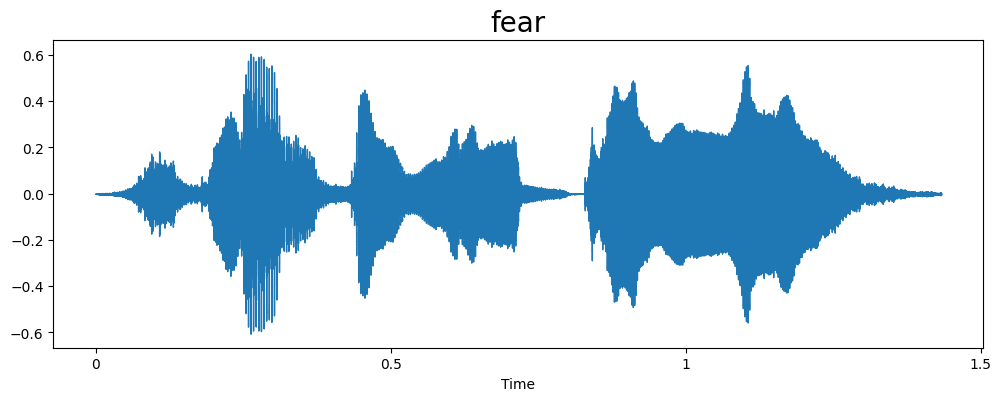

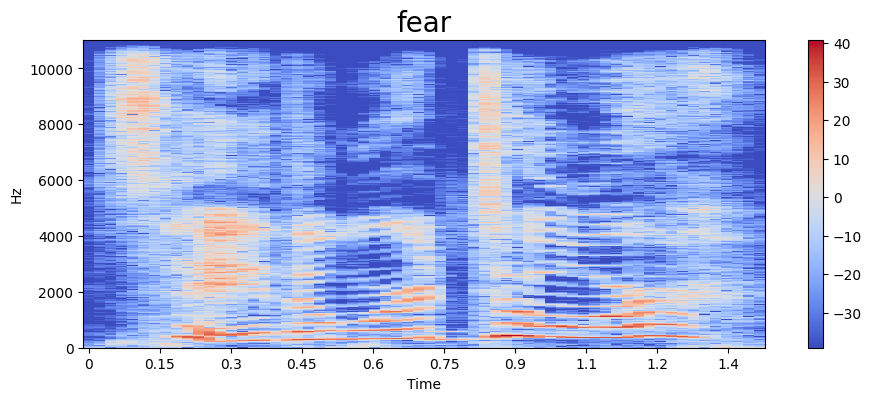

In [108]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

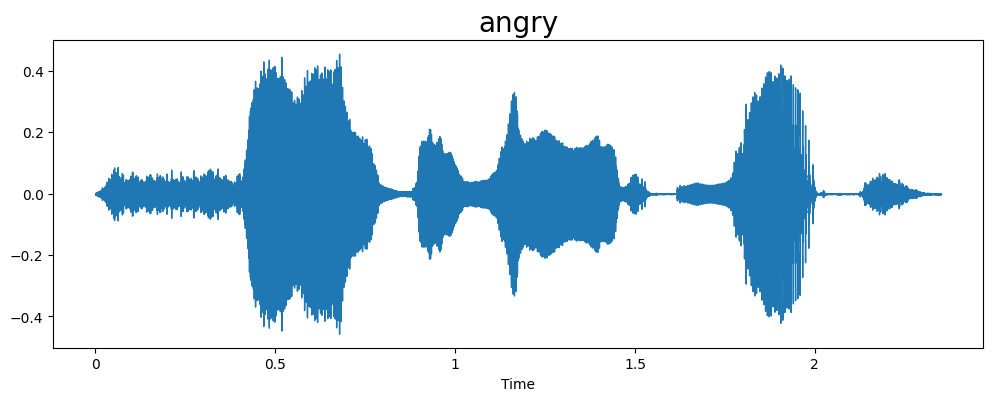

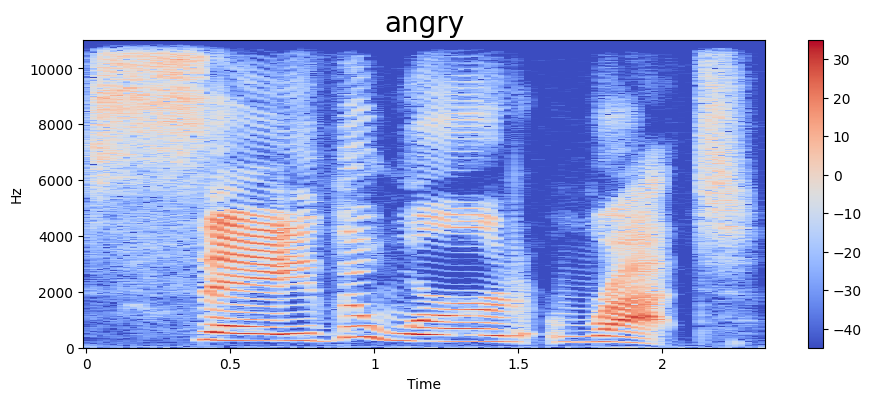

In [109]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

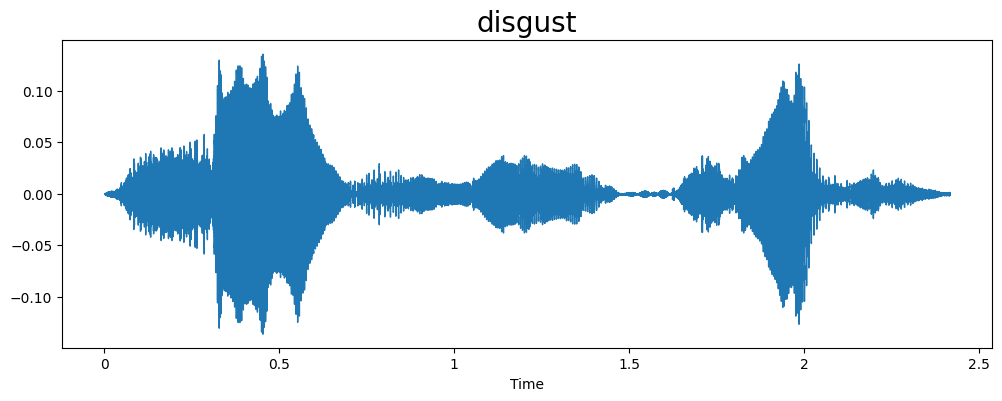

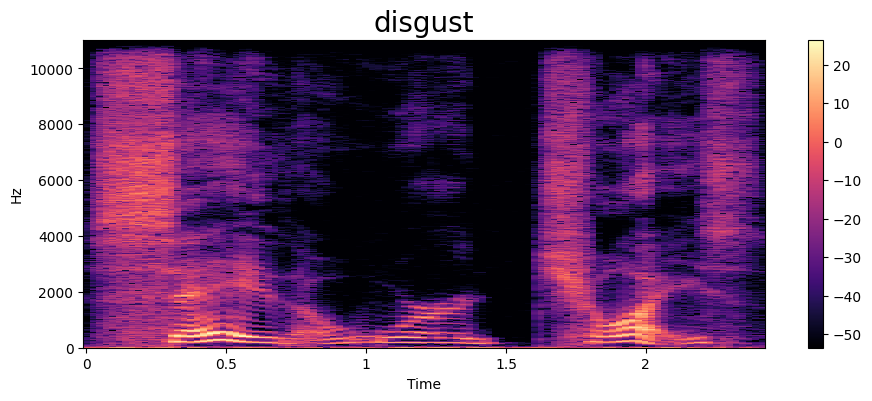

In [112]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

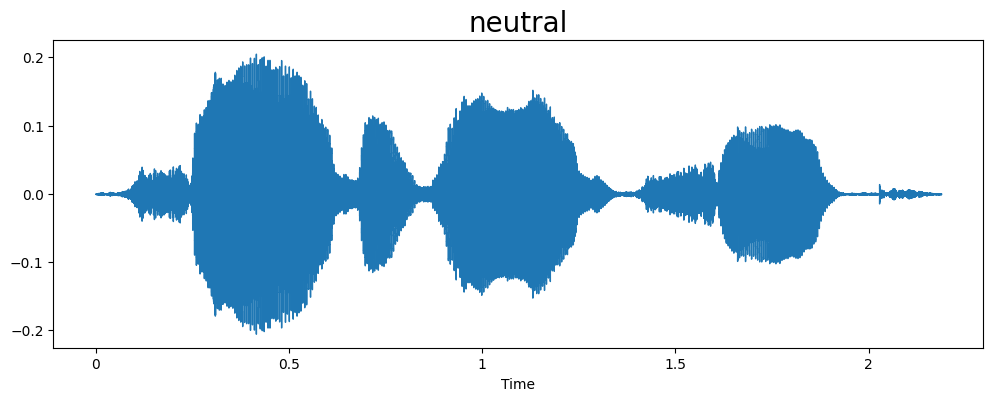

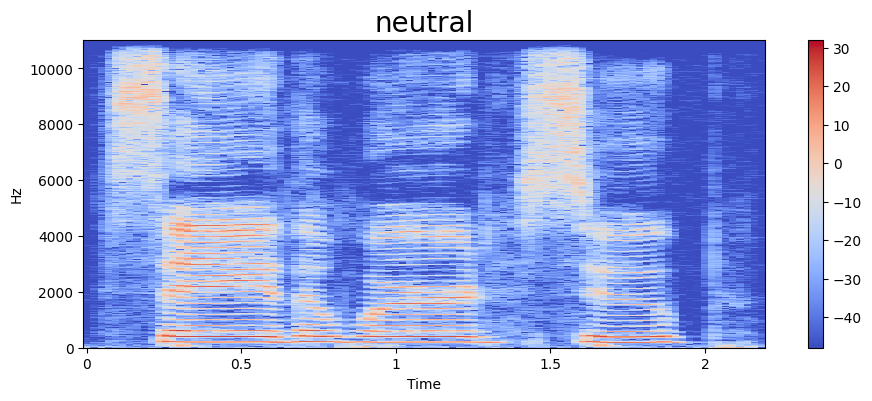

In [111]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

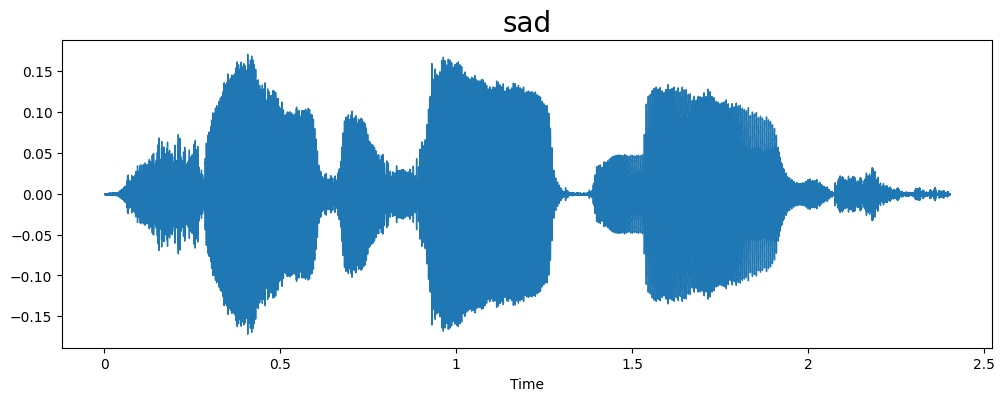

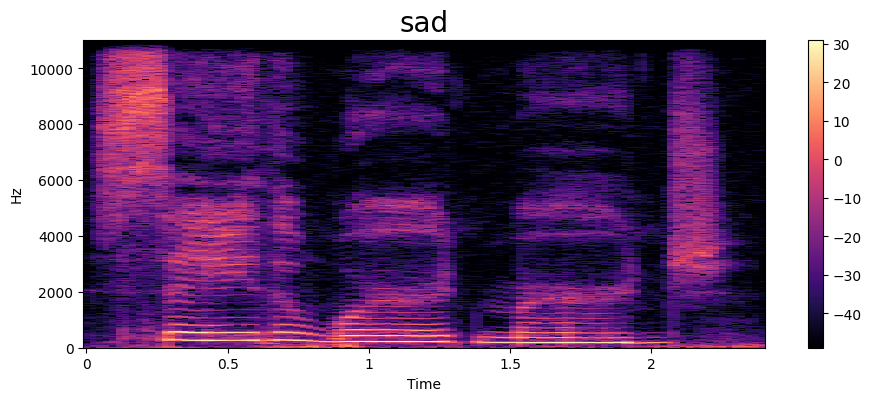

In [113]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

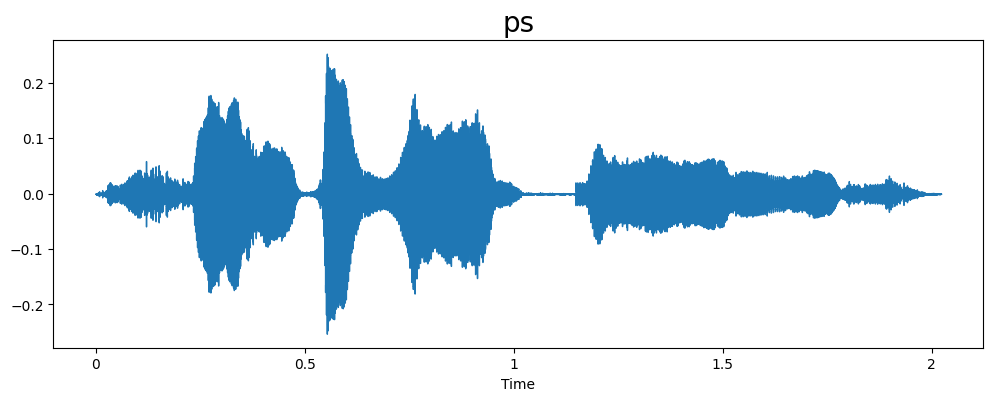

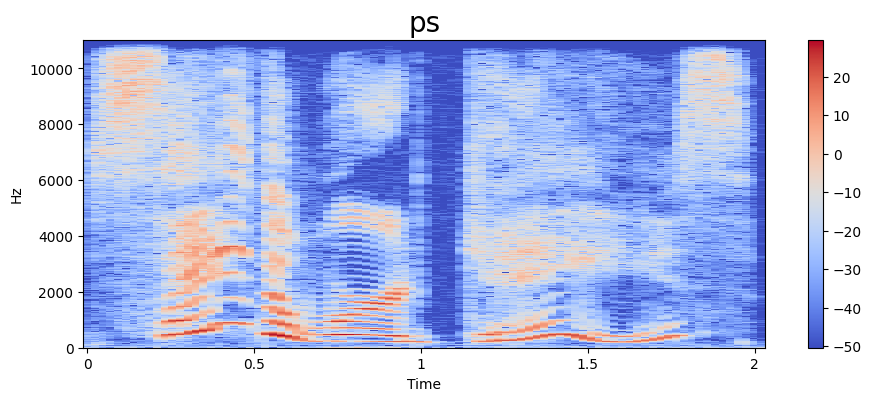

In [114]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

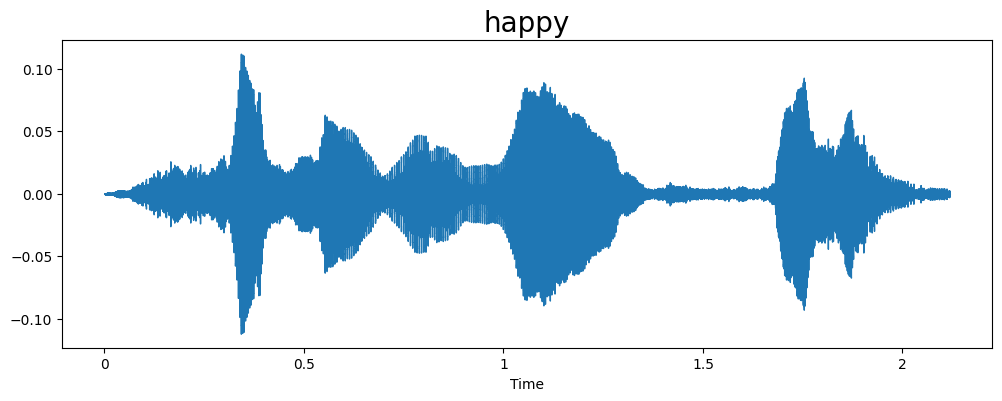

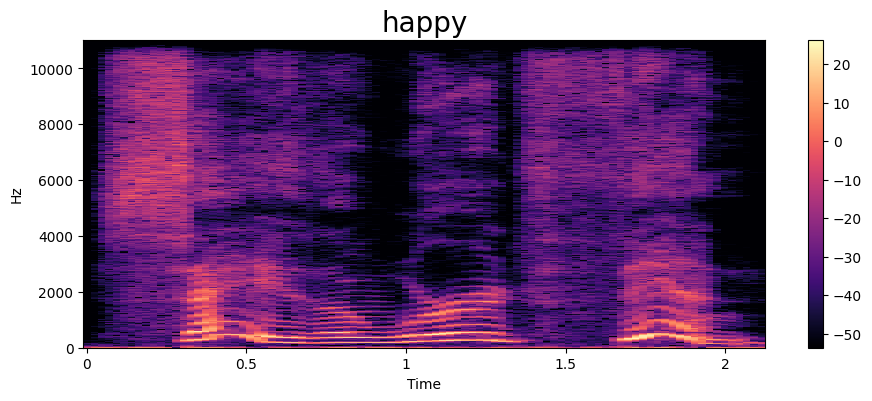

In [115]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [116]:
def extract_mfcc(filename):
     y, sr = librosa.load(filename, duration=3, offset=0.5)
     mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
     return mfcc

In [117]:
extract_mfcc(df['speech'][0])

array([-398.0483    ,   61.14327   ,    0.7473985 ,   30.037645  ,
          5.220017  ,    2.2898293 ,   -2.3684816 ,  -19.472813  ,
          2.2891314 ,    3.212495  ,  -16.750315  ,    9.388042  ,
         -6.4337926 ,    5.6060567 ,    4.717254  ,   -6.7628284 ,
          2.5118592 ,    1.3100445 ,  -10.906294  ,    0.95050186,
         -3.2765143 ,   -4.6886616 ,   -6.596714  ,   -1.3696078 ,
         -7.113242  ,   -1.413671  ,   -5.274223  ,   -0.45162034,
         -7.208074  ,   -4.1486425 ,   -8.388042  ,    8.699304  ,
         10.622856  ,   26.455866  ,   28.966034  ,   25.62832   ,
         15.171698  ,    4.3339214 ,   -4.2325463 ,    0.8848837 ],
      dtype=float32)

In [118]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [119]:
X_mfcc

0       [-398.0483, 61.14327, 0.7473985, 30.037645, 5....
1       [-369.88782, 85.77526, -16.971945, 21.958464, ...
2       [-446.3158, 117.82322, 6.6040306, 7.1723204, -...
3       [-428.8235, 99.777954, 2.0802312, 32.124146, 4...
4       [-371.4322, 107.30623, -23.698473, 12.9541645,...
                              ...                        
2795    [-451.1156, 77.32987, 5.4195395, 48.129513, 3....
2796    [-401.20413, 65.523476, 6.2082295, 38.822365, ...
2797    [-436.38425, 95.59354, 11.097916, 11.03332, -1...
2798    [-405.21143, 92.63942, -15.800639, 13.7942505,...
2799    [-432.39413, 102.41474, -3.0104957, 25.03206, ...
Name: speech, Length: 2800, dtype: object

In [120]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [121]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [122]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [123]:
y = y.toarray()
y.shape

(2800, 7)

In [124]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 7)                

In [125]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 10s 187ms/step - loss: 1.2164 - accuracy: 0.5433 - val_loss: 1.8466 - val_accuracy: 0.3304
Epoch 2/50
35/35 [==============================] - 7s 211ms/step - loss: 0.5264 - accuracy: 0.7879 - val_loss: 1.5412 - val_accuracy: 0.5268
Epoch 3/50
35/35 [==============================] - 6s 166ms/step - loss: 0.3121 - accuracy: 0.8969 - val_loss: 1.2040 - val_accuracy: 0.6857
Epoch 4/50
35/35 [==============================] - 8s 220ms/step - loss: 0.1833 - accuracy: 0.9393 - val_loss: 0.6030 - val_accuracy: 0.8518
Epoch 5/50
35/35 [==============================] - 6s 172ms/step - loss: 0.1820 - accuracy: 0.9491 - val_loss: 1.6868 - val_accuracy: 0.5821
Epoch 6/50
35/35 [==============================] - 8s 218ms/step - loss: 0.1639 - accuracy: 0.9513 - val_loss: 1.0140 - val_accuracy: 0.7839
Epoch 7/50
35/35 [==============================] - 7s 190ms/step - loss: 0.0930 - accuracy: 0.9705 - val_loss: 2.0387 - val_accuracy: 0.6268
Epoch

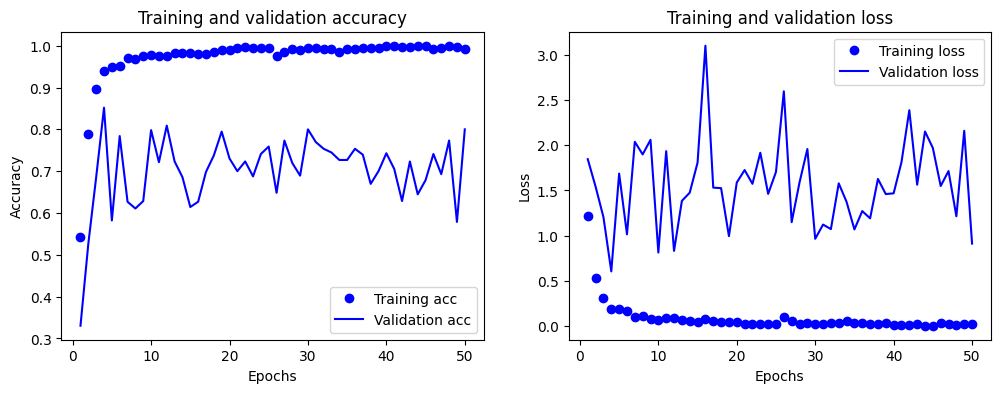

In [126]:
plotHistory(history)


In [129]:
#Calculate the accuracy of our model
accuracy= history.history['accuracy']
val_accuracy=history.history['val_accuracy']

#Print the accu"racy
print(accuracy)

[0.5433035492897034, 0.7879464030265808, 0.8968750238418579, 0.9392856955528259, 0.9491071701049805, 0.9513393044471741, 0.9705356955528259, 0.9678571224212646, 0.9754464030265808, 0.9785714149475098, 0.9745535850524902, 0.9758928418159485, 0.9834821224212646, 0.9830357432365417, 0.9834821224212646, 0.9799107313156128, 0.981249988079071, 0.9857142567634583, 0.9901785850524902, 0.9901785850524902, 0.9941964149475098, 0.9964285492897034, 0.9937499761581421, 0.9946428537368774, 0.9946428537368774, 0.9763392806053162, 0.9857142567634583, 0.9933035969734192, 0.9906250238418579, 0.9937499761581421, 0.9937499761581421, 0.9919642806053162, 0.9910714030265808, 0.9839285612106323, 0.9919642806053162, 0.9915178418159485, 0.9937499761581421, 0.9950892925262451, 0.9941964149475098, 0.9986607432365417, 0.9982143044471741, 0.9977678656578064, 0.9959821701049805, 1.0, 1.0, 0.9915178418159485, 0.9950892925262451, 0.9982143044471741, 0.996874988079071, 0.9933035969734192]


In [156]:


# Find the best accuracy
best_accuracy = max(accuracy)
best_val_accuracy = max(val_accuracy)

# Calculate the average accuracy
average_accuracy = np.mean(accuracy)

# Calculate the mean accuracy
mean_accuracy = np.median(accuracy)

print("Average accuracy of the model: {:.2f}%".format(average_accuracy * 100))

print("Mean accuracy of the model: {:.2f}%".format(mean_accuracy * 100))

# Convert best accuracy to percentage
best_accuracy_percentage = best_accuracy * 100
best_val_accuracy_percentage = best_val_accuracy * 100
print("Best accuracy of the model: {:.2f}%\n".format(best_accuracy_percentage))



Average accuracy of the model: 97.19%
Mean accuracy of the model: 99.13%
Best accuracy of the model: 100.00%



In [146]:
import pickle
# Writing different model files to file
with open( 'Model2.h5', 'wb') as f:
    pickle.dump(model,f)

In [161]:
filename = 'Model2.h5'
loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage

feature=extract_mfcc("/content/TESS Toronto emotional speech set data/YAF_happy/YAF_base_happy.wav")

feature=feature.reshape(1,-1)

prediction=loaded_model.predict(feature)

# Convert numerical predictions to sentiment labels
sentiment_labels = ['angry','disgust','fear','happy','neutral','ps','sad' ]  # Replace with your actual sentiment labels

# Get the index of the highest probability
predicted_index = np.argmax(prediction)

# Get the corresponding sentiment label
predicted_sentiment = sentiment_labels[predicted_index]

print("Predicted sentiment:", predicted_sentiment)


1/1 [==============================] - 1s 523ms/step
Predicted sentiment: happy
